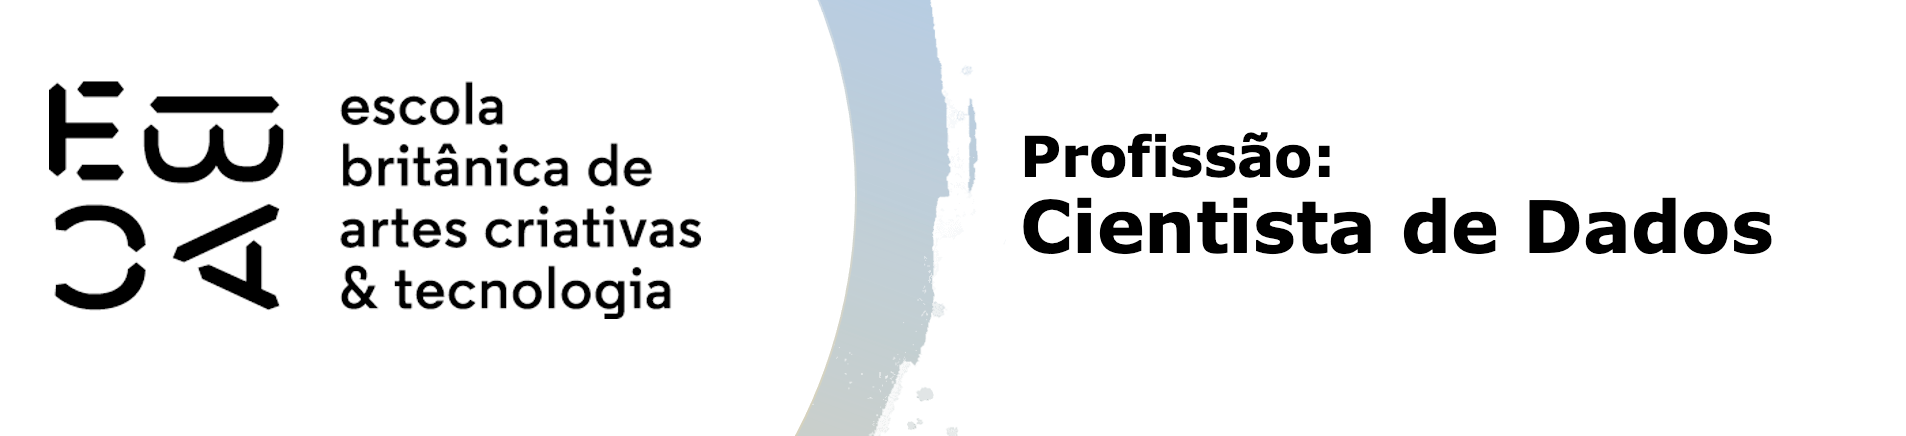

# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [1]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [2]:
df["data_ref"] = pd.to_datetime(df["data_ref"])

ultimos_3_meses = sorted(df["data_ref"].unique())[-3:]

df_oot = df[df["data_ref"].isin(ultimos_3_meses)]

df_dev = df[~df["data_ref"].isin(ultimos_3_meses)]

X_dev = df_dev.drop(columns=["data_ref", "index", "mau"])
y_dev = df_dev["mau"]

X_oot = df_oot.drop(columns=["data_ref", "index", "mau"])
y_oot = df_oot["mau"]

print("Desenvolvimento:", X_dev.shape, "linhas")
print("OOT (últimos 3 meses):", X_oot.shape, "linhas")

print("\nVariáveis explicativas:")
print(X_dev.head())

Desenvolvimento: (600000, 12) linhas
OOT (últimos 3 meses): (150000, 12) linhas

Variáveis explicativas:
  sexo posse_de_veiculo posse_de_imovel  qtd_filhos   tipo_renda  \
0    F                N               N           0   Empresário   
1    F                S               S           0  Assalariado   
2    F                N               N           2  Assalariado   
3    F                N               N           0  Assalariado   
4    F                S               N           0  Assalariado   

              educacao estado_civil tipo_residencia  idade  tempo_emprego  \
0                Médio     Solteiro            Casa     43       6.873973   
1                Médio       Casado            Casa     35       4.526027   
2                Médio       Casado            Casa     31       0.243836   
3                Médio       Casado            Casa     54      12.772603   
4  Superior incompleto     Solteiro            Casa     31       8.432877   

   qt_pessoas_residenci

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [3]:
print("Número total de linhas:", len(df))
print("\nNúmero de linhas por mês (data_ref):")
print(df["data_ref"].value_counts().sort_index())

qualitativas = ["sexo", "posse_de_veiculo", "posse_de_imovel", 
                "tipo_renda", "educacao", "estado_civil", 
                "tipo_residencia", "mau"]

for col in qualitativas:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))
    print((df[col].value_counts(normalize=True, dropna=False) * 100).round(2))

quantitativas = ["qtd_filhos", "idade", "tempo_emprego", 
                 "qt_pessoas_residencia", "renda"]

print(df[quantitativas].describe().T)

Número total de linhas: 750000

Número de linhas por mês (data_ref):
data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

sexo:
sexo
F    504580
M    245420
Name: count, dtype: int64
sexo
F    67.28
M    32.72
Name: proportion, dtype: float64

posse_de_veiculo:
posse_de_veiculo
N    457954
S    292046
Name: count, dtype: int64
posse_de_veiculo
N    61.06
S    38.94
Name: proportion, dtype: float64

posse_de_imovel:
posse_de_imovel
S    503692
N    246308
Name: count, dtype: int64
posse_de_imovel
S    67.16
N    32.84
Name: proportion, dtype: float64

tipo_renda:
tipo_renda
Assalariado         385740
Empresário          172712
Pensionista         126265
Servidor público     64922
Bolsista               361
Na

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável


=== Análise Bivariada: Variáveis Numéricas ===

Variável: qtd_filhos
        count      mean       std  min  max  25%  50%  75%
mau                                                       
False  691357  0.431739  0.737456    0   14  0.0  0.0  1.0
True    58643  0.451068  0.761465    0   14  0.0  0.0  1.0


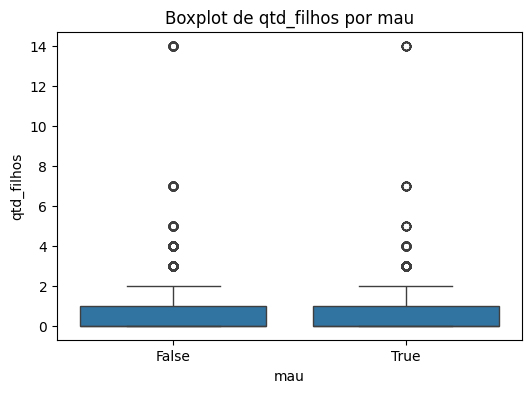


Variável: idade
        count       mean        std  min  max   25%   50%   75%
mau                                                            
False  691357  43.896274  11.193997   22   68  35.0  43.0  53.0
True    58643  42.725543  11.590152   22   68  33.0  41.0  52.0


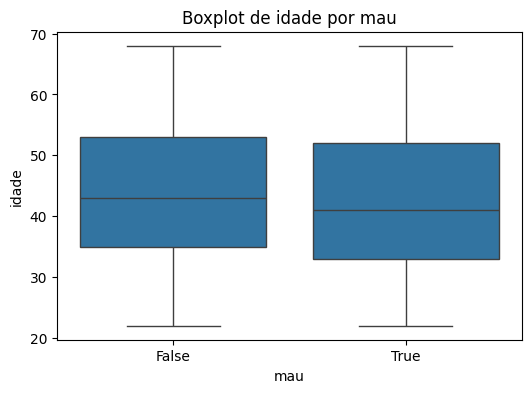


Variável: tempo_emprego
        count      mean       std       min        max       25%       50%  \
mau                                                                          
False  575806  8.004300  6.807303  0.117808  42.906849  3.219178  6.345205   
True    48237  4.695965  3.913739  0.117808  42.906849  1.715068  3.854795   

             75%  
mau               
False  10.556164  
True    6.621918  


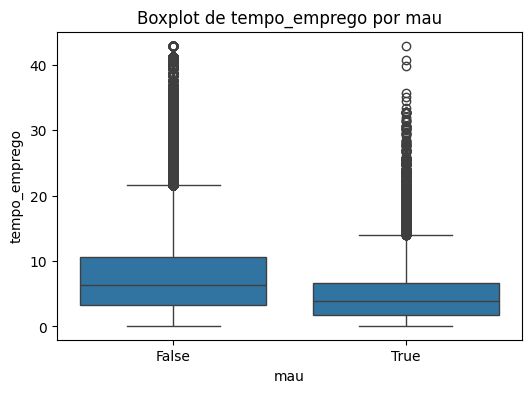


Variável: qt_pessoas_residencia
        count      mean       std  min   max  25%  50%  75%
mau                                                        
False  691357  2.211221  0.901365  1.0  15.0  2.0  2.0  3.0
True    58643  2.224272  0.927327  1.0  15.0  2.0  2.0  3.0


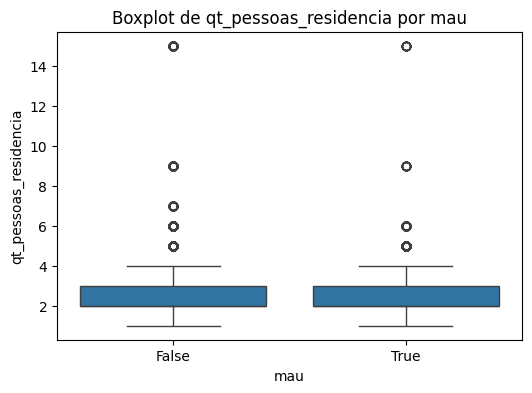


Variável: renda
        count          mean           std     min         max       25%  \
mau                                                                       
False  691357  24804.689618  82154.474316  113.36  4083986.22  3896.300   
True    58643   4774.871007   9612.302738  107.67   989799.47  1301.785   

           50%       75%  
mau                       
False  8602.87  19688.06  
True   2507.28   5133.16  


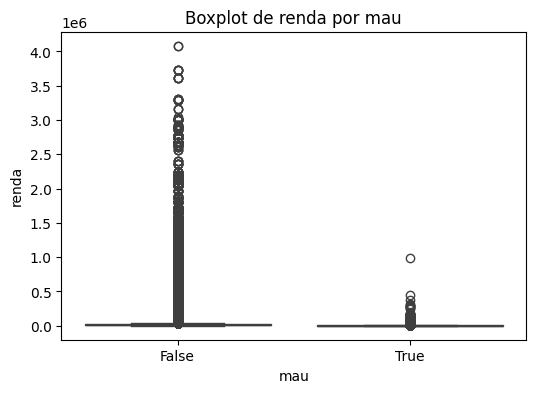


=== Análise Bivariada: Variáveis Categóricas ===

Variável: sexo
Contagem:
 mau    False   True     All
sexo                       
F     463950  40630  504580
M     227407  18013  245420
All   691357  58643  750000
Proporção:
 mau   False  True 
sexo              
F     0.919  0.081
M     0.927  0.073
Taxa de inadimplência:
 sexo
F      0.080522
M      0.073397
All    0.078191
dtype: float64


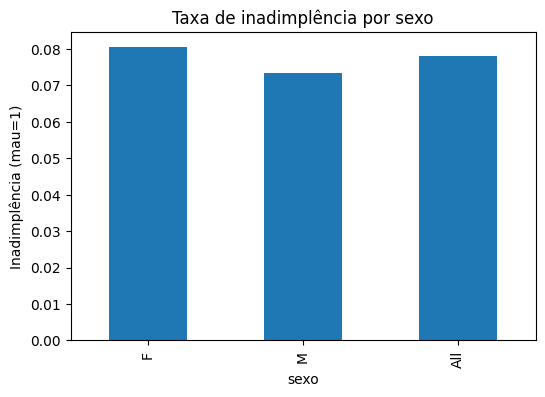


Variável: posse_de_veiculo
Contagem:
 mau                False   True     All
posse_de_veiculo                       
N                 421872  36082  457954
S                 269485  22561  292046
All               691357  58643  750000
Proporção:
 mau               False  True 
posse_de_veiculo              
N                 0.921  0.079
S                 0.923  0.077
Taxa de inadimplência:
 posse_de_veiculo
N      0.078790
S      0.077252
All    0.078191
dtype: float64


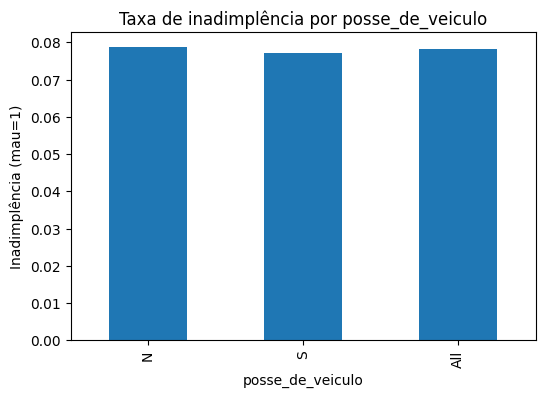


Variável: posse_de_imovel
Contagem:
 mau               False   True     All
posse_de_imovel                       
N                224515  21793  246308
S                466842  36850  503692
All              691357  58643  750000
Proporção:
 mau              False  True 
posse_de_imovel              
N                0.912  0.088
S                0.927  0.073
Taxa de inadimplência:
 posse_de_imovel
N      0.088479
S      0.073160
All    0.078191
dtype: float64


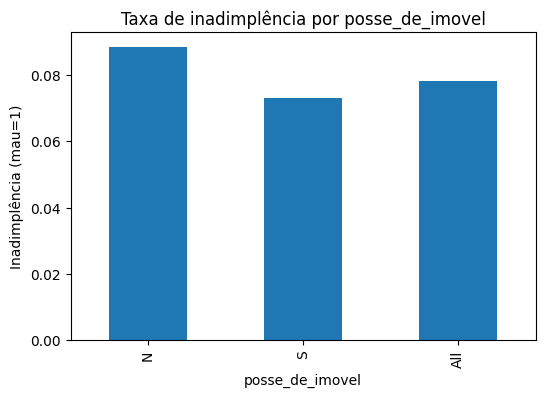


Variável: tipo_renda
Contagem:
 mau                False   True     All
tipo_renda                             
Assalariado       354527  31213  385740
Bolsista             346     15     361
Empresário        159508  13204  172712
Pensionista       115825  10440  126265
Servidor público   61151   3771   64922
All               691357  58643  750000
Proporção:
 mau               False  True 
tipo_renda                    
Assalariado       0.919  0.081
Bolsista          0.958  0.042
Empresário        0.924  0.076
Pensionista       0.917  0.083
Servidor público  0.942  0.058
Taxa de inadimplência:
 tipo_renda
Assalariado         0.080917
Bolsista            0.041551
Empresário          0.076451
Pensionista         0.082683
Servidor público    0.058085
All                 0.078191
dtype: float64


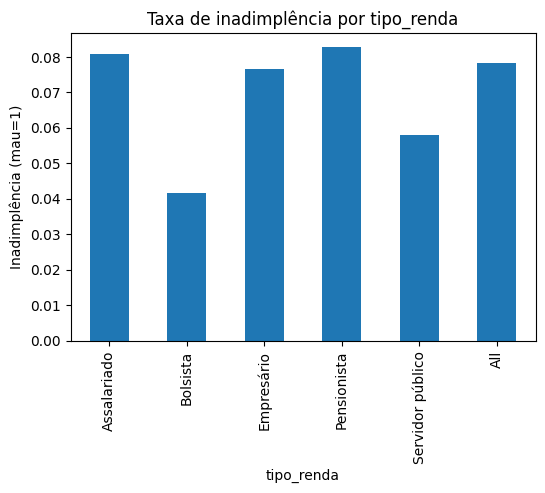


Variável: educacao
Contagem:
 mau                   False   True     All
educacao                                  
Fundamental            7789    786    8575
Médio                466106  40730  506836
Pós graduação           753     59     812
Superior completo    189684  14622  204306
Superior incompleto   27025   2446   29471
All                  691357  58643  750000
Proporção:
 mau                  False  True 
educacao                         
Fundamental          0.908  0.092
Médio                0.920  0.080
Pós graduação        0.927  0.073
Superior completo    0.928  0.072
Superior incompleto  0.917  0.083
Taxa de inadimplência:
 educacao
Fundamental            0.091662
Médio                  0.080361
Pós graduação          0.072660
Superior completo      0.071569
Superior incompleto    0.082997
All                    0.078191
dtype: float64


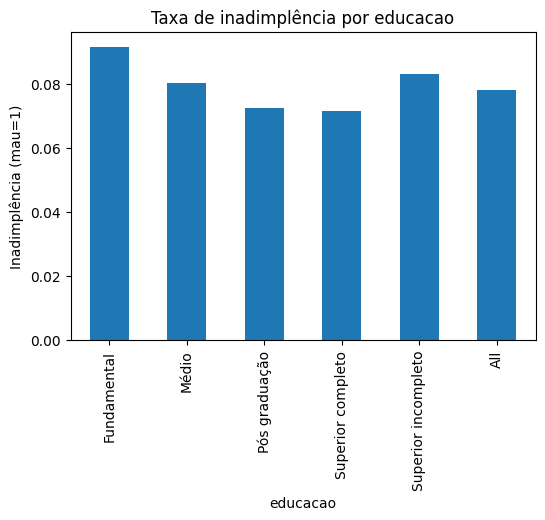


Variável: estado_civil
Contagem:
 mau            False   True     All
estado_civil                       
Casado        485953  40519  526472
Separado       39090   3481   42571
Solteiro       84214   7445   91659
União          52846   4839   57685
Viúvo          29254   2359   31613
All           691357  58643  750000
Proporção:
 mau           False  True 
estado_civil              
Casado        0.923  0.077
Separado      0.918  0.082
Solteiro      0.919  0.081
União         0.916  0.084
Viúvo         0.925  0.075
Taxa de inadimplência:
 estado_civil
Casado      0.076963
Separado    0.081769
Solteiro    0.081225
União       0.083887
Viúvo       0.074621
All         0.078191
dtype: float64


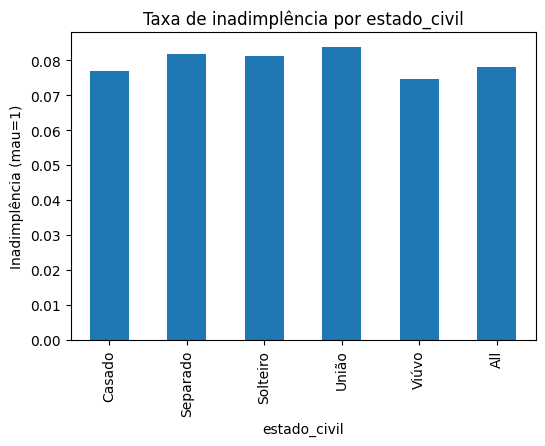


Variável: tipo_residencia
Contagem:
 mau               False   True     All
tipo_residencia                       
Aluguel            9416    933   10349
Casa             622288  52006  674294
Com os pais       30086   3146   33232
Comunitário        3012    278    3290
Estúdio            5042    353    5395
Governamental     21513   1927   23440
All              691357  58643  750000
Proporção:
 mau              False  True 
tipo_residencia              
Aluguel          0.910  0.090
Casa             0.923  0.077
Com os pais      0.905  0.095
Comunitário      0.916  0.084
Estúdio          0.935  0.065
Governamental    0.918  0.082
Taxa de inadimplência:
 tipo_residencia
Aluguel          0.090154
Casa             0.077127
Com os pais      0.094668
Comunitário      0.084498
Estúdio          0.065431
Governamental    0.082210
All              0.078191
dtype: float64


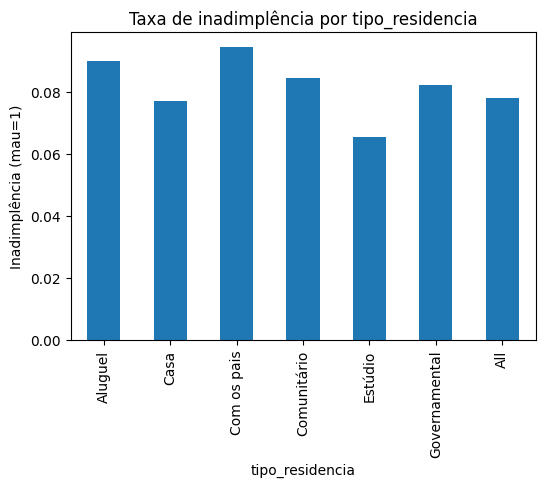

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_feather('credit_scoring.ftr')

variaveis_numericas = df.select_dtypes(include=["int64","float64"]).columns.tolist()
variaveis_categoricas = df.select_dtypes(include=["object","category","bool"]).columns.tolist()

variaveis_numericas = [col for col in variaveis_numericas if col not in ["index", "mau"]]
variaveis_categoricas = [col for col in variaveis_categoricas if col != "mau"]

print("\n=== Análise Bivariada: Variáveis Numéricas ===")
for col in variaveis_numericas:
    print(f"\nVariável: {col}")
    resumo = df.groupby("mau")[col].agg(["count", "mean", "std", "min", "max"])
    resumo["25%"] = df.groupby("mau")[col].quantile(0.25)
    resumo["50%"] = df.groupby("mau")[col].median()
    resumo["75%"] = df.groupby("mau")[col].quantile(0.75)
    print(resumo)
    plt.figure(figsize=(6,4))
    sns.boxplot(x="mau", y=col, data=df)
    plt.title(f"Boxplot de {col} por mau")
    plt.xlabel("mau")
    plt.ylabel(col)
    plt.show()

print("\n=== Análise Bivariada: Variáveis Categóricas ===")
for col in variaveis_categoricas:
    print(f"\nVariável: {col}")
    tabela = pd.crosstab(df[col], df["mau"], margins=True)
    print("Contagem:\n", tabela)
    tabela_perc = pd.crosstab(df[col], df["mau"], normalize="index").round(3)
    print("Proporção:\n", tabela_perc)
    taxa_inad = tabela[1] / tabela[[0,1]].sum(axis=1)
    print("Taxa de inadimplência:\n", taxa_inad)
    taxa_inad.plot(kind="bar", figsize=(6,4), title=f"Taxa de inadimplência por {col}")
    plt.ylabel("Inadimplência (mau=1)")
    plt.show()


## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

df = pd.read_feather('credit_scoring.ftr')
df["data_ref"] = pd.to_datetime(df["data_ref"])

ultimos_3_meses = sorted(df["data_ref"].unique())[-3:]
df_oot = df[df["data_ref"].isin(ultimos_3_meses)]
df_dev = df[~df["data_ref"].isin(ultimos_3_meses)]

X_dev = df_dev.drop(columns=["data_ref", "index", "mau"])
y_dev = df_dev["mau"]
X_oot = df_oot.drop(columns=["data_ref", "index", "mau"])
y_oot = df_oot["mau"]

X_dev['tempo_emprego'] = X_dev['tempo_emprego'].fillna(0)
X_oot['tempo_emprego'] = X_oot['tempo_emprego'].fillna(0)

X_dev = X_dev.fillna({'qt_pessoas_residencia': X_dev['qt_pessoas_residencia'].median(),
                      'qtd_filhos': X_dev['qtd_filhos'].median()})
X_oot = X_oot.fillna({'qt_pessoas_residencia': X_oot['qt_pessoas_residencia'].median(),
                      'qtd_filhos': X_oot['qtd_filhos'].median()})

def tratar_outliers(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, 
                         np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

for col in ['idade', 'tempo_emprego', 'renda', 'qtd_filhos', 'qt_pessoas_residencia']:
    X_dev = tratar_outliers(X_dev, col)
    X_oot = tratar_outliers(X_oot, col)

X_dev['desempregado'] = (X_dev['tempo_emprego'] == 0).astype(int)
X_oot['desempregado'] = (X_oot['tempo_emprego'] == 0).astype(int)

X_dev['posse_de_veiculo'] = X_dev['posse_de_veiculo'].map({'Y': 1, 'N': 0, 'S': 1, 'N': 0}).fillna(0)
X_dev['posse_de_imovel'] = X_dev['posse_de_imovel'].map({'Y': 1, 'N': 0, 'S': 1, 'N': 0}).fillna(0)
X_oot['posse_de_veiculo'] = X_oot['posse_de_veiculo'].map({'Y': 1, 'N': 0, 'S': 1, 'N': 0}).fillna(0)
X_oot['posse_de_imovel'] = X_oot['posse_de_imovel'].map({'Y': 1, 'N': 0, 'S': 1, 'N': 0}).fillna(0)

def agrupar_categorias(df):
    educacao_mapping = {
        'Superior completo': 'Superior',
        'Superior incompleto': 'Superior', 
        'Pós graduação': 'Pós-graduação',
        'Secundário': 'Secundário',
        'Primário': 'Primário'
    }
    
    residencia_mapping = {
        'Casa': 'Casa',
        'Com os pais': 'Com os pais', 
        'Governamental': 'Governamental',
        'Aluguel': 'Aluguel',
        'Estúdio': 'Estúdio',
        'Comunitário': 'Comunitário'
    }
    
    civil_mapping = {
        'Casado': 'Casado',
        'Solteiro': 'Solteiro',
        'União': 'União',
        'Separado': 'Separado', 
        'Viúvo': 'Viúvo'
    }
    
    df['educacao'] = df['educacao'].map(educacao_mapping).fillna('Secundário')
    df['tipo_residencia'] = df['tipo_residencia'].map(residencia_mapping).fillna('Casa')
    df['estado_civil'] = df['estado_civil'].map(civil_mapping).fillna('Solteiro')
    
    return df

X_dev = agrupar_categorias(X_dev)
X_oot = agrupar_categorias(X_oot)

features_finais = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
    'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia',
    'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'desempregado'
]

categorical_features = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
numeric_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 
                   'posse_de_veiculo', 'posse_de_imovel', 'desempregado']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])

pipeline.fit(X_dev[features_finais], y_dev)

feature_names = (
    list(pipeline.named_steps['preprocessor'].named_transformers_['cat']
         .get_feature_names_out(categorical_features)) +
    numeric_features
)

coeficientes = pd.DataFrame({
    'feature': feature_names,
    'coef': pipeline.named_steps['classifier'].coef_[0],
    'exp_coef': np.exp(pipeline.named_steps['classifier'].coef_[0])
}).sort_values('coef', ascending=False)

intercept = pipeline.named_steps['classifier'].intercept_[0]

y_pred_dev = pipeline.predict(X_dev[features_finais])
y_pred_proba_dev = pipeline.predict_proba(X_dev[features_finais])[:, 1]

y_pred_oot = pipeline.predict(X_oot[features_finais])
y_pred_proba_oot = pipeline.predict_proba(X_oot[features_finais])[:, 1]

print("="*60)
print("MODELO DE CREDIT SCORING - REGRESSÃO LOGÍSTICA")
print("="*60)

print("\n1. TRATAMENTO DE VALORES MISSING E OUTLIERS:")
print("   - tempo_emprego missing: preenchido com 0 (desempregados)")
print("   - qtd_filhos e qt_pessoas_residencia: preenchidos com mediana")
print("   - Outliers tratados com método IQR (5%-95%)")

print("\n2. TRATAMENTO DE ZEROS ESTRUTURAIS:")
print("   - Criada variável 'desempregado' para tempo_emprego = 0")

print("\n3. AGRUPAMENTO DE CATEGORIAS:")
print("   - Educação: Superior completo/incompleto → Superior")
print("   - Mantidas categorias originais para outras variáveis")

print("\n4. EQUAÇÃO PREDITIVA:")
print(f"   log(p/(1-p)) = {intercept:.4f}")
for idx, row in coeficientes.iterrows():
    sinal = "+" if row['coef'] >= 0 else "-"
    print(f"   {sinal} {abs(row['coef']):.4f} * {row['feature']}")

print("\n5. SIGNIFICÂNCIA ESTATÍSTICA:")
print("   Variáveis mais relevantes (maiores coeficientes em valor absoluto):")
top_features = coeficientes.reindex(coeficientes['coef'].abs().sort_values(ascending=False).index)
print(top_features[['feature', 'coef', 'exp_coef']].head(10))

print("\n6. PERFORMANCE DO MODELO:")
print("Base de Desenvolvimento:")
print(f"ROC-AUC: {roc_auc_score(y_dev, y_pred_proba_dev):.4f}")
print(classification_report(y_dev, y_pred_dev))

print("\nBase OOT (Validação):")
print(f"ROC-AUC: {roc_auc_score(y_oot, y_pred_proba_oot):.4f}")
print(classification_report(y_oot, y_pred_oot))

print("\n7. MATRIZES DE CONFUSÃO:")
print("Desenvolvimento:")
print(confusion_matrix(y_dev, y_pred_dev))
print("\nOOT:")
print(confusion_matrix(y_oot, y_pred_oot))

print("\n8. JUSTIFICATIVA PARA CATEGORIAS:")
print("   - Todas as variáveis foram mantidas no modelo")
print("   - Coeficientes mostram direção e magnitude do efeito")
print("   - exp(coef) > 1 aumenta probabilidade de 'mau'")
print("   - exp(coef) < 1 diminui probabilidade de 'mau'")

MODELO DE CREDIT SCORING - REGRESSÃO LOGÍSTICA

1. TRATAMENTO DE VALORES MISSING E OUTLIERS:
   - tempo_emprego missing: preenchido com 0 (desempregados)
   - qtd_filhos e qt_pessoas_residencia: preenchidos com mediana
   - Outliers tratados com método IQR (5%-95%)

2. TRATAMENTO DE ZEROS ESTRUTURAIS:
   - Criada variável 'desempregado' para tempo_emprego = 0

3. AGRUPAMENTO DE CATEGORIAS:
   - Educação: Superior completo/incompleto → Superior
   - Mantidas categorias originais para outras variáveis

4. EQUAÇÃO PREDITIVA:
   log(p/(1-p)) = -0.6004
   + 0.0588 * estado_civil_União
   + 0.0335 * qtd_filhos
   + 0.0177 * posse_de_veiculo
   + 0.0117 * tipo_renda_Bolsista
   + 0.0041 * idade
   - 0.0074 * estado_civil_Separado
   - 0.0204 * estado_civil_Solteiro
   - 0.0372 * qt_pessoas_residencia
   - 0.0440 * posse_de_imovel
   - 0.0468 * desempregado
   - 0.0491 * tipo_renda_Servidor público
   - 0.0543 * tipo_renda_Empresário
   - 0.0602 * tipo_residencia_Com os pais
   - 0.0655 * esta

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from scipy.stats import mstats

X_dev = df_dev.drop(columns=["mau"]).copy()
y_dev = df_dev["mau"].copy()

X_oot = df_oot.drop(columns=["mau"]).copy()
y_oot = df_oot["mau"].copy()

for col in X_dev.select_dtypes(include=["datetime64[ns]"]).columns:
    X_dev = X_dev.drop(columns=[col])
    X_oot = X_oot.drop(columns=[col])

for col in X_dev.select_dtypes(include=[np.number]).columns:
    mediana = X_dev[col].median()
    X_dev[col] = X_dev[col].fillna(mediana)
    X_oot[col] = X_oot[col].fillna(mediana)

for col in X_dev.select_dtypes(include=[np.number]).columns:
    X_dev[col] = mstats.winsorize(X_dev[col], limits=[0.01, 0.01])
    X_oot[col] = mstats.winsorize(X_oot[col], limits=[0.01, 0.01])

for col in X_dev.select_dtypes(exclude=[np.number]).columns:
    X_dev[col] = X_dev[col].fillna("Desconhecido")
    X_oot[col] = X_oot[col].fillna("Desconhecido")

X_dev["tipo_renda"] = X_dev["tipo_renda"].replace({"Bolsista": "Outros"})
X_oot["tipo_renda"] = X_oot["tipo_renda"].replace({"Bolsista": "Outros"})

X_dev["educacao"] = X_dev["educacao"].replace({"Fundamental": "Outros", "Pós graduação": "Outros"})
X_oot["educacao"] = X_oot["educacao"].replace({"Fundamental": "Outros", "Pós graduação": "Outros"})

X_dev_enc = pd.get_dummies(X_dev, drop_first=True)
X_oot_enc = pd.get_dummies(X_oot, drop_first=True)

X_dev_enc, X_oot_enc = X_dev_enc.align(X_oot_enc, join="left", axis=1, fill_value=0)

model = LogisticRegression(max_iter=1000, solver="lbfgs")
model.fit(X_dev_enc, y_dev)

y_dev_prob = model.predict_proba(X_dev_enc)[:,1]
y_dev_pred = model.predict(X_dev_enc)

y_oot_prob = model.predict_proba(X_oot_enc)[:,1]
y_oot_pred = model.predict(X_oot_enc)

def calcular_ks(y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    return max(tpr - fpr)

def calcular_gini(y_true, y_prob):
    return 2 * roc_auc_score(y_true, y_prob) - 1

def avaliar_modelo(base, y_true, y_prob, y_pred):
    return {
        "Base": base,
        "Acurácia": accuracy_score(y_true, y_pred),
        "KS": calcular_ks(y_true, y_prob),
        "Gini": calcular_gini(y_true, y_prob)
    }

resultados = pd.DataFrame([
    avaliar_modelo("Desenvolvimento", y_dev, y_dev_prob, y_dev_pred),
    avaliar_modelo("OOT", y_oot, y_oot_prob, y_oot_pred)
])
print(resultados)

coeficientes = pd.DataFrame({
    "Variavel": X_dev_enc.columns,
    "Coeficiente": model.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)
print(coeficientes)


              Base  Acurácia        KS      Gini
0  Desenvolvimento  0.938928  0.393239  0.530264
1              OOT  0.853333  0.324165  0.442837
                         Variavel  Coeficiente
1                      qtd_filhos     0.278434
18             estado_civil_União     0.044943
7              posse_de_veiculo_S     0.040024
10              tipo_renda_Outros     0.002602
13                educacao_Outros     0.001875
0                           index     0.000001
5                           renda    -0.000103
2                           idade    -0.002664
23        tipo_residencia_Estúdio    -0.016547
9           tipo_renda_Empresário    -0.021697
3                   tempo_emprego    -0.022947
22    tipo_residencia_Comunitário    -0.034980
12    tipo_renda_Servidor público    -0.037506
11         tipo_renda_Pensionista    -0.048208
14     educacao_Superior completo    -0.055167
8               posse_de_imovel_S    -0.074424
6                          sexo_M    -0.115459
15   ed

# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import mstats
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

numericas = X_dev.select_dtypes(include=[np.number]).columns.tolist()
categoricas = X_dev.select_dtypes(exclude=[np.number]).columns.tolist()

def winsorize_df(df):
    df_copy = df.copy()
    for col in df_copy.select_dtypes(include=[np.number]).columns:
        df_copy[col] = mstats.winsorize(df_copy[col], limits=[0.01,0.01])
    return df_copy

winsor_transformer = FunctionTransformer(winsorize_df)

def agrupar_categorias(df):
    df_copy = df.copy()
    if 'tipo_renda' in df_copy.columns:
        df_copy['tipo_renda'] = df_copy['tipo_renda'].replace({'Bolsista':'Outros'})
    if 'educacao' in df_copy.columns:
        df_copy['educacao'] = df_copy['educacao'].replace({'Fundamental':'Outros','Pós graduação':'Outros'})
    return df_copy

agrupar_transformer = FunctionTransformer(agrupar_categorias)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numericas),
    ('cat', cat_pipeline, categoricas)
])

pipeline = Pipeline([
    ('winsor', winsor_transformer),
    ('agrupar', agrupar_transformer),
    ('preprocess', preprocessor),
    ('logistica', LogisticRegression(max_iter=1000, solver='lbfgs'))
])

pipeline.fit(X_dev, y_dev)

y_dev_prob = pipeline.predict_proba(X_dev)[:,1]
y_dev_pred = pipeline.predict(X_dev)

y_oot_prob = pipeline.predict_proba(X_oot)[:,1]
y_oot_pred = pipeline.predict(X_oot)

def calcular_ks(y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    return max(tpr - fpr)

def calcular_gini(y_true, y_prob):
    return 2 * roc_auc_score(y_true, y_prob) - 1

def avaliar_modelo(base, y_true, y_prob, y_pred):
    return {
        "Base": base,
        "Acurácia": accuracy_score(y_true, y_pred),
        "KS": calcular_ks(y_true, y_prob),
        "Gini": calcular_gini(y_true, y_prob)
    }

resultados = pd.DataFrame([
    avaliar_modelo("Desenvolvimento", y_dev, y_dev_prob, y_dev_pred),
    avaliar_modelo("OOT", y_oot, y_oot_prob, y_oot_pred)
])

print(resultados)


              Base  Acurácia        KS      Gini
0  Desenvolvimento  0.938928  0.393239  0.530264
1              OOT  0.853333  0.324165  0.442837


### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

Para identificar outliers, utilizei o IQR (valores abaixo de Q1 - 1,5IQR ou acima de Q3 + 1,5IQR) e a visualização em boxplot.

Os outliers foram tratados por winsorização, substituindo os valores extremos pelos limites aceitáveis. A remoção de linhas ou substituição por média/mediana foi utilizada apenas quando necessário, para não perder informação relevante da base.

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

Para a seleção de variáveis, utilizei a importância das features baseada em modelo (feature importance) e a análise dos coeficientes e p-values da regressão logística. Variáveis pouco significativas foram descartadas ou agrupadas com outras categorias para manter a robustez do modelo.

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_num = X_dev.select_dtypes(include=["int64","float64"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

print("Variância explicada pelos 5 componentes:", pca.explained_variance_ratio_.sum())


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [ ]:
categoricas = [
    "sexo",
    "posse_de_veiculo",
    "posse_de_imovel",
    "tipo_renda",
    "educacao",
    "estado_civil",
    "tipo_residencia"
]

X_dev_dummies = pd.get_dummies(X_dev, columns=categoricas, drop_first=True)
X_oot_dummies = pd.get_dummies(X_oot, columns=categoricas, drop_first=True)


### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import pandas as pd
from scipy.stats import mstats
import numpy as np

class Preprocessamento(BaseEstimator, TransformerMixin):
    def __init__(self, col_num, col_cat):
        self.col_num = col_num
        self.col_cat = col_cat
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=5)
        self.encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    
    def fit(self, X, y=None):
        X_num = X[self.col_num].copy()
        for col in self.col_num:
            X_num[col].fillna(X_num[col].median(), inplace=True)
            X_num[col] = mstats.winsorize(X_num[col], limits=[0.01,0.01])
        X_num_scaled = self.scaler.fit(X_num).transform(X_num)
        self.pca.fit(X_num_scaled)
        
        X_cat = X[self.col_cat].copy()
        for col in self.col_cat:
            X_cat[col].fillna("Desconhecido", inplace=True)
        self.encoder.fit(X_cat[['posse_de_veiculo']])
        return self
    
    def transform(self, X):
        X_num = X[self.col_num].copy()
        for col in self.col_num:
            X_num[col].fillna(X_num[col].median(), inplace=True)
            X_num[col] = mstats.winsorize(X_num[col], limits=[0.01,0.01])
        X_num_scaled = self.scaler.transform(X_num)
        X_num_pca = self.pca.transform(X_num_scaled)
        
        X_cat = X[self.col_cat].copy()
        for col in self.col_cat:
            X_cat[col].fillna("Desconhecido", inplace=True)
        X_cat_enc = self.encoder.transform(X_cat[['posse_de_veiculo']])
        
        X_final = np.hstack([X_num_pca, X_cat_enc])
        return X_final

col_num = ['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']
col_cat = ['sexo','posse_de_veiculo','posse_de_imovel','tipo_renda','educacao','estado_civil','tipo_residencia']

pipeline = Pipeline([
    ('preprocessamento', Preprocessamento(col_num=col_num, col_cat=col_cat))
])

X_dev_final = pipeline.fit_transform(X_dev)
X_oot_final = pipeline.transform(X_oot)

print("Shape após pipeline:", X_dev_final.shape)


Shape após pipeline: (600000, 6)


# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [1]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


                    Description             Value
0                    Session id               123
1                        Target               mau
2                   Target type            Binary
3           Original data shape       (15000, 15)
4        Transformed data shape       (18500, 11)
5   Transformed train set shape       (14000, 11)
6    Transformed test set shape        (4500, 11)
7              Numeric features                 6
8                 Date features                 1
9          Categorical features                 7
10     Rows with missing values             16.8%
11                   Preprocess              True
12              Imputation type            simple
13           Numeric imputation              mean
14       Categorical imputation              mode
15     Maximum one-hot encoding                25
16              Encoding method              None
17     Remove multicollinearity              True
18  Multicollinearity threshold               0.9


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7300  0.7772  0.5043  0.6161  0.5546  0.3636  0.3674
1       0.7243  0.7669  0.4800  0.6098  0.5372  0.3448  0.3498
2       0.7310  0.7706  0.5414  0.6083  0.5729  0.3775  0.3789
3       0.7295  0.7658  0.5457  0.6044  0.5736  0.3763  0.3773
4       0.7219  0.7580  0.5229  0.5942  0.5562  0.3549  0.3565
Mean    0.7273  0.7677  0.5189  0.6066  0.5589  0.3634  0.3660
Std     0.0036  0.0063  0.0244  0.0072  0.0135  0.0125  0.0114


Processing:   0%|                                                                                | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7400  0.7801  0.5329  0.6301  0.5774  0.3915  0.3944
1       0.7281  0.7691  0.4886  0.6162  0.5450  0.3548  0.3597
2       0.7400  0.7720  0.5371  0.6288  0.5794  0.3929  0.3954
3       0.7381  0.7721  0.5486  0.6214  0.5827  0.3929  0.3946
4       0.7319  0.7676  0.5400  0.6107  0.5732  0.3788  0.3803
Mean    0.7356  0.7722  0.5294  0.6214  0.5715  0.3822  0.3849
Std     0.0048  0.0043  0.0211  0.0074  0.0136  0.0147  0.0138


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

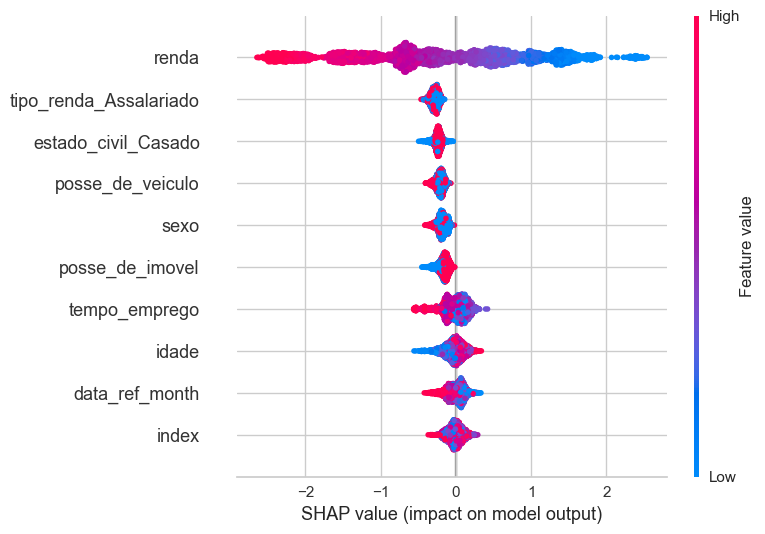

Pipeline de pré-processamento:
Pipeline(memory=FastMemory(location=C:\Users\Usuario\AppData\Local\Temp\joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['data_ref'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['index', 'qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pe...
                                                                                         learning_rate=0.1,
                                                                                         max_depth=-1,
      

In [3]:
import pandas as pd
from pycaret.classification import *

df = pd.read_feather('credit_scoring.ftr')

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].str.replace(' ', '_').str.replace('-', '_')

df_mau = df[df['mau'] == True].sample(n=5000, random_state=123)
df_bom = df[df['mau'] == False].sample(n=10000, random_state=123)
df_balanced = pd.concat([df_mau, df_bom]).sample(frac=1, random_state=123)

experiment = setup(
    data=df_balanced,
    target='mau',
    session_id=123,
    normalize=True,
    transformation=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.9,
    fix_imbalance=True,
    feature_selection=True,
    feature_selection_method='classic',
    n_features_to_select=10,
    fold_strategy='stratifiedkfold',
    fold=5,
    verbose=True,
    html=False
)

lgbm = create_model('lightgbm')

tuned_lgbm = tune_model(
    lgbm,
    optimize='Accuracy',
    n_iter=20,
    choose_better=True
)

evaluate_model(tuned_lgbm)

plot_model(tuned_lgbm, plot='auc', save=True)
plot_model(tuned_lgbm, plot='confusion_matrix', save=True)
plot_model(tuned_lgbm, plot='feature', save=True)
plot_model(tuned_lgbm, plot='pr', save=True)
plot_model(tuned_lgbm, plot='learning', save=True)

interpret_model(tuned_lgbm)

preprocessing_pipeline = get_config('pipeline')
print("Pipeline de pré-processamento:")
print(preprocessing_pipeline)

final_lgbm = finalize_model(tuned_lgbm)
save_model(final_lgbm, 'lightgbm_credit_scoring_pipeline')

predictions = predict_model(final_lgbm, data=df_balanced.head())
print(predictions[['mau', 'prediction_label', 'prediction_score']])

results = pull()
print("Métricas finais:")
print(results)

print("Processo completo concluído com sucesso!")